# Decision Tree Classifier Experiments on Dermatology Dataset

In this section, we will:
- Load the prepared train/test splits from the data preparation notebook
- Train a Decision Tree Classifier (using information gain/entropy) for each split
- Visualize each resulting tree using Graphviz
- Evaluate each model on its test set using classification metrics and confusion matrices

This workflow enables a comprehensive comparison of model performance across different train/test proportions.

In [26]:
# Imports
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import graphviz

Total samples: 366

Missing values per column:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_micr

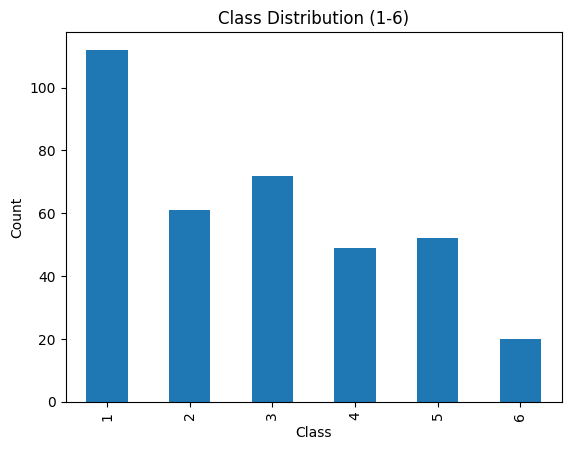

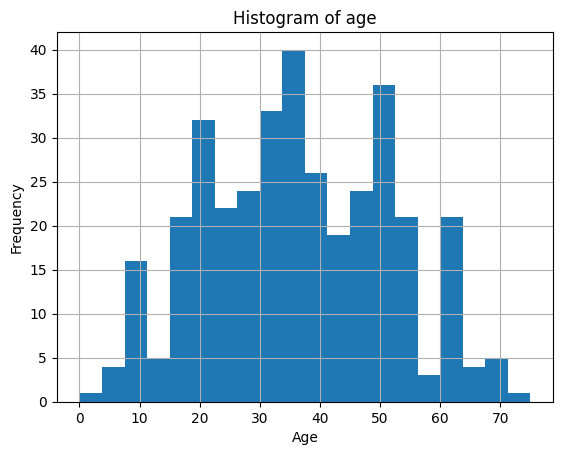


Missing after imputation:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess             

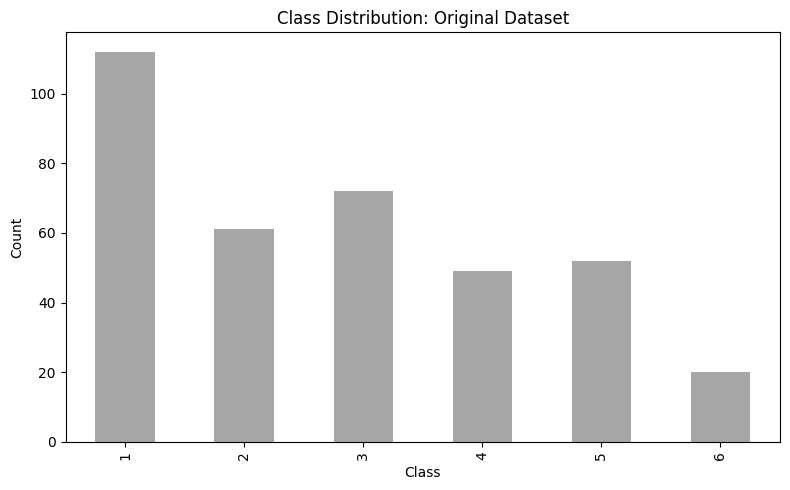

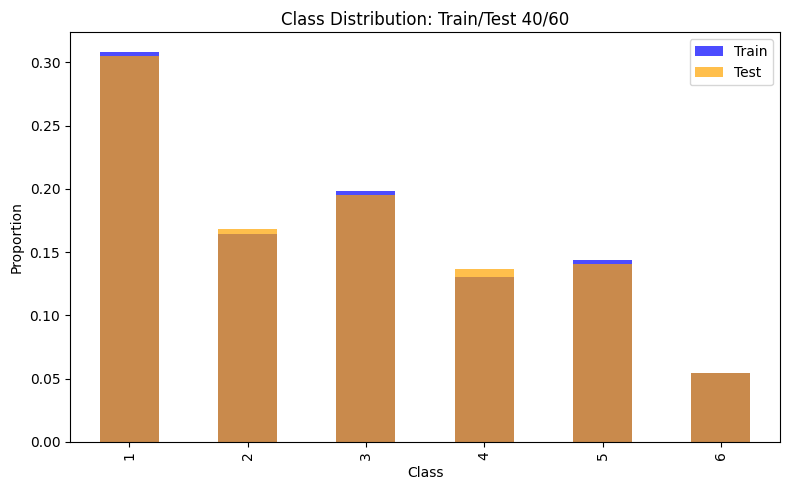

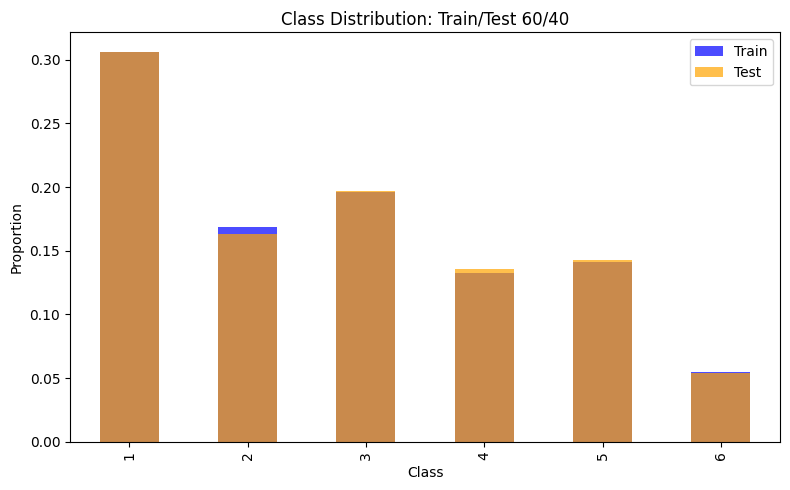

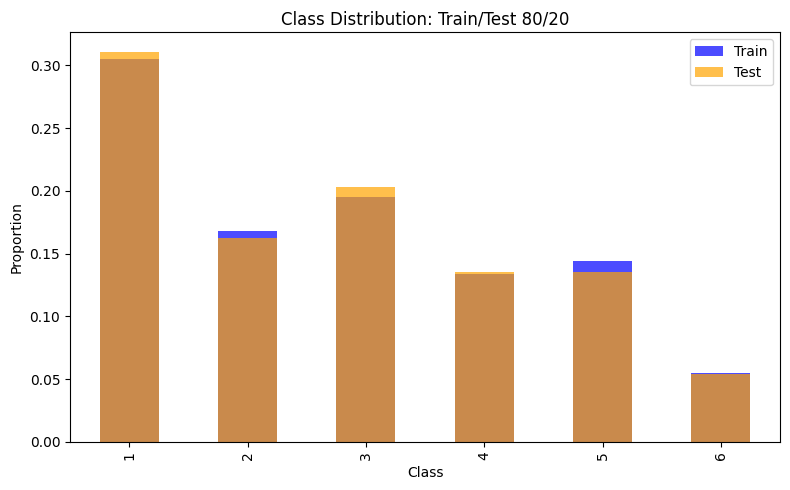

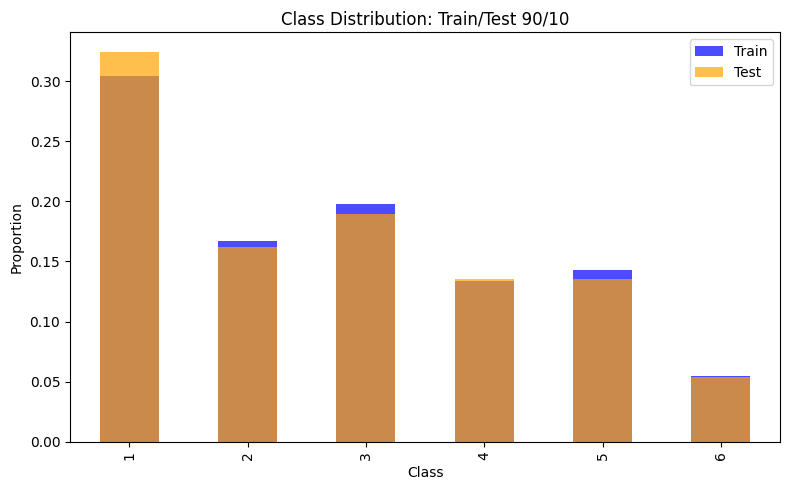

In [27]:
# Load prepared data splits
%run 03_additional_dataset_preparation.ipynb


try:
    _ = feature_train_40_60
except NameError:
    raise RuntimeError("Please run the data preparation notebook first to define the train/test split variables in memory.")

splits = [
    ("40/60", feature_train_40_60, feature_test_40_60, label_train_40_60, label_test_40_60),
    ("60/40", feature_train_60_40, feature_test_60_40, label_train_60_40, label_test_60_40),
    ("80/20", feature_train_80_20, feature_test_80_20, label_train_80_20, label_test_80_20),
    ("90/10", feature_train_90_10, feature_test_90_10, label_train_90_10, label_test_90_10),
]


=== Decision Tree for 40/60 split ===


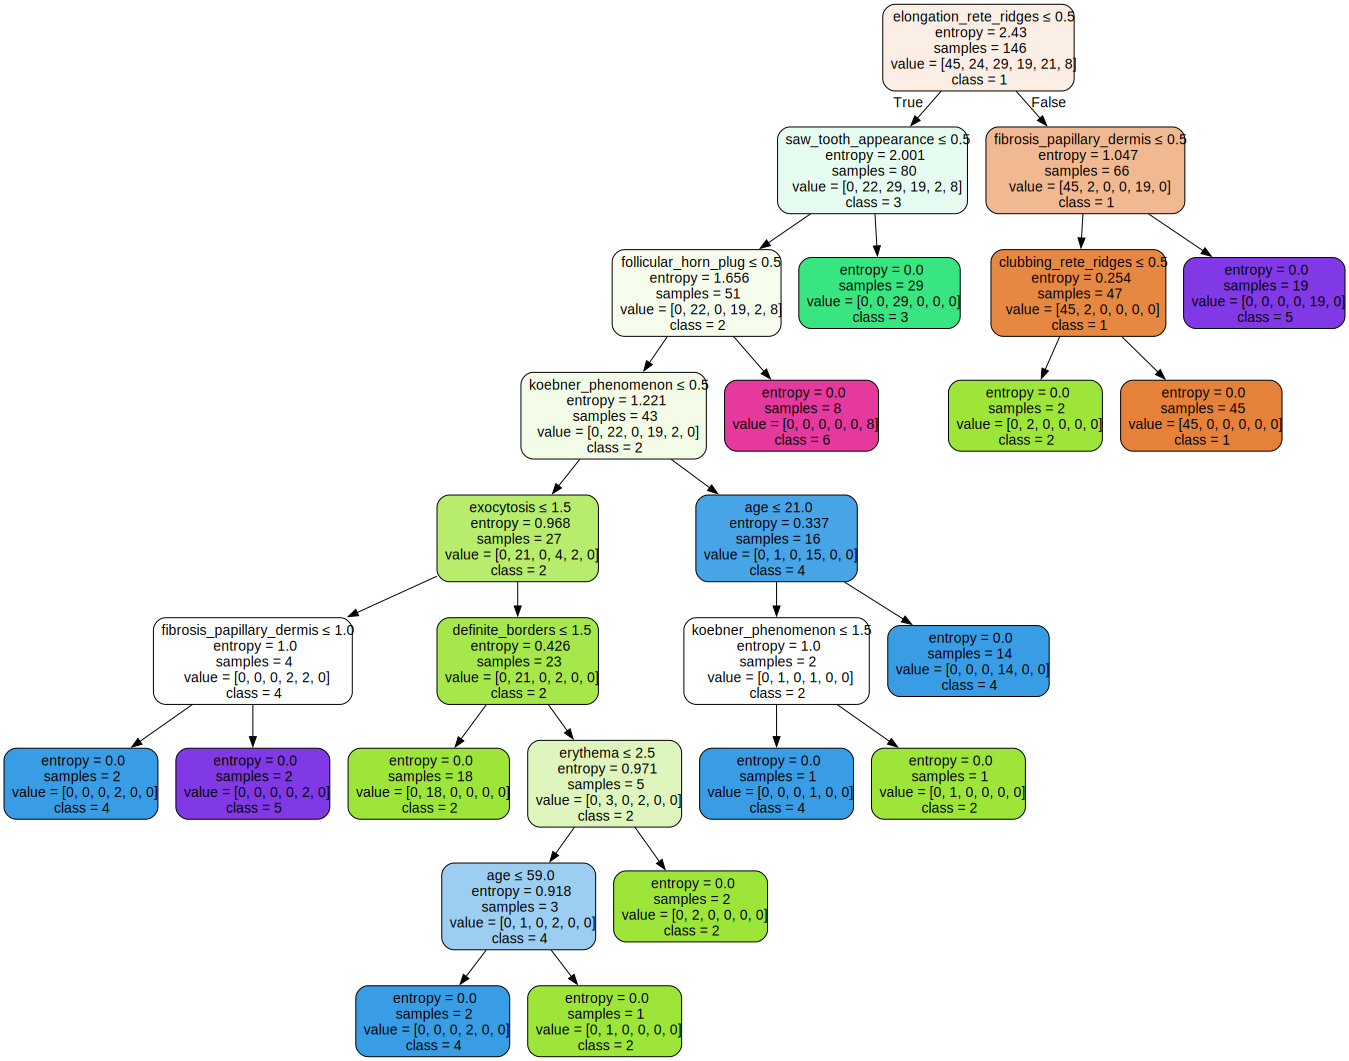


Classification Report for (40/60 split):
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        67
           2       0.68      0.70      0.69        37
           3       0.98      0.98      0.98        43
           4       0.62      0.70      0.66        30
           5       1.00      0.97      0.98        31
           6       0.90      0.75      0.82        12

    accuracy                           0.87       220
   macro avg       0.86      0.84      0.85       220
weighted avg       0.88      0.87      0.88       220

Crude Confusion matrix for (40/60 split):
[[64  3  0  0  0  0]
 [ 0 26  0 10  0  1]
 [ 0  0 42  1  0  0]
 [ 0  8  1 21  0  0]
 [ 0  0  0  1 30  0]
 [ 1  1  0  1  0  9]]


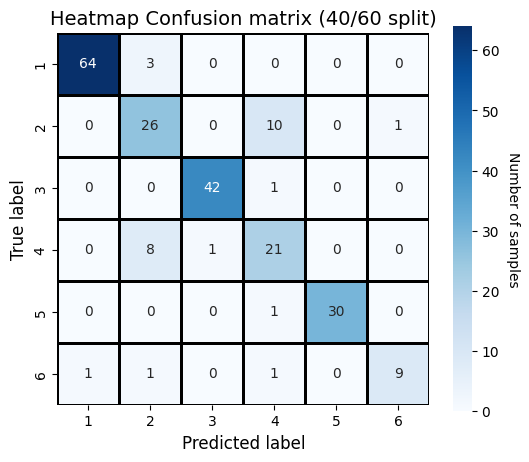


=== Decision Tree for 60/40 split ===


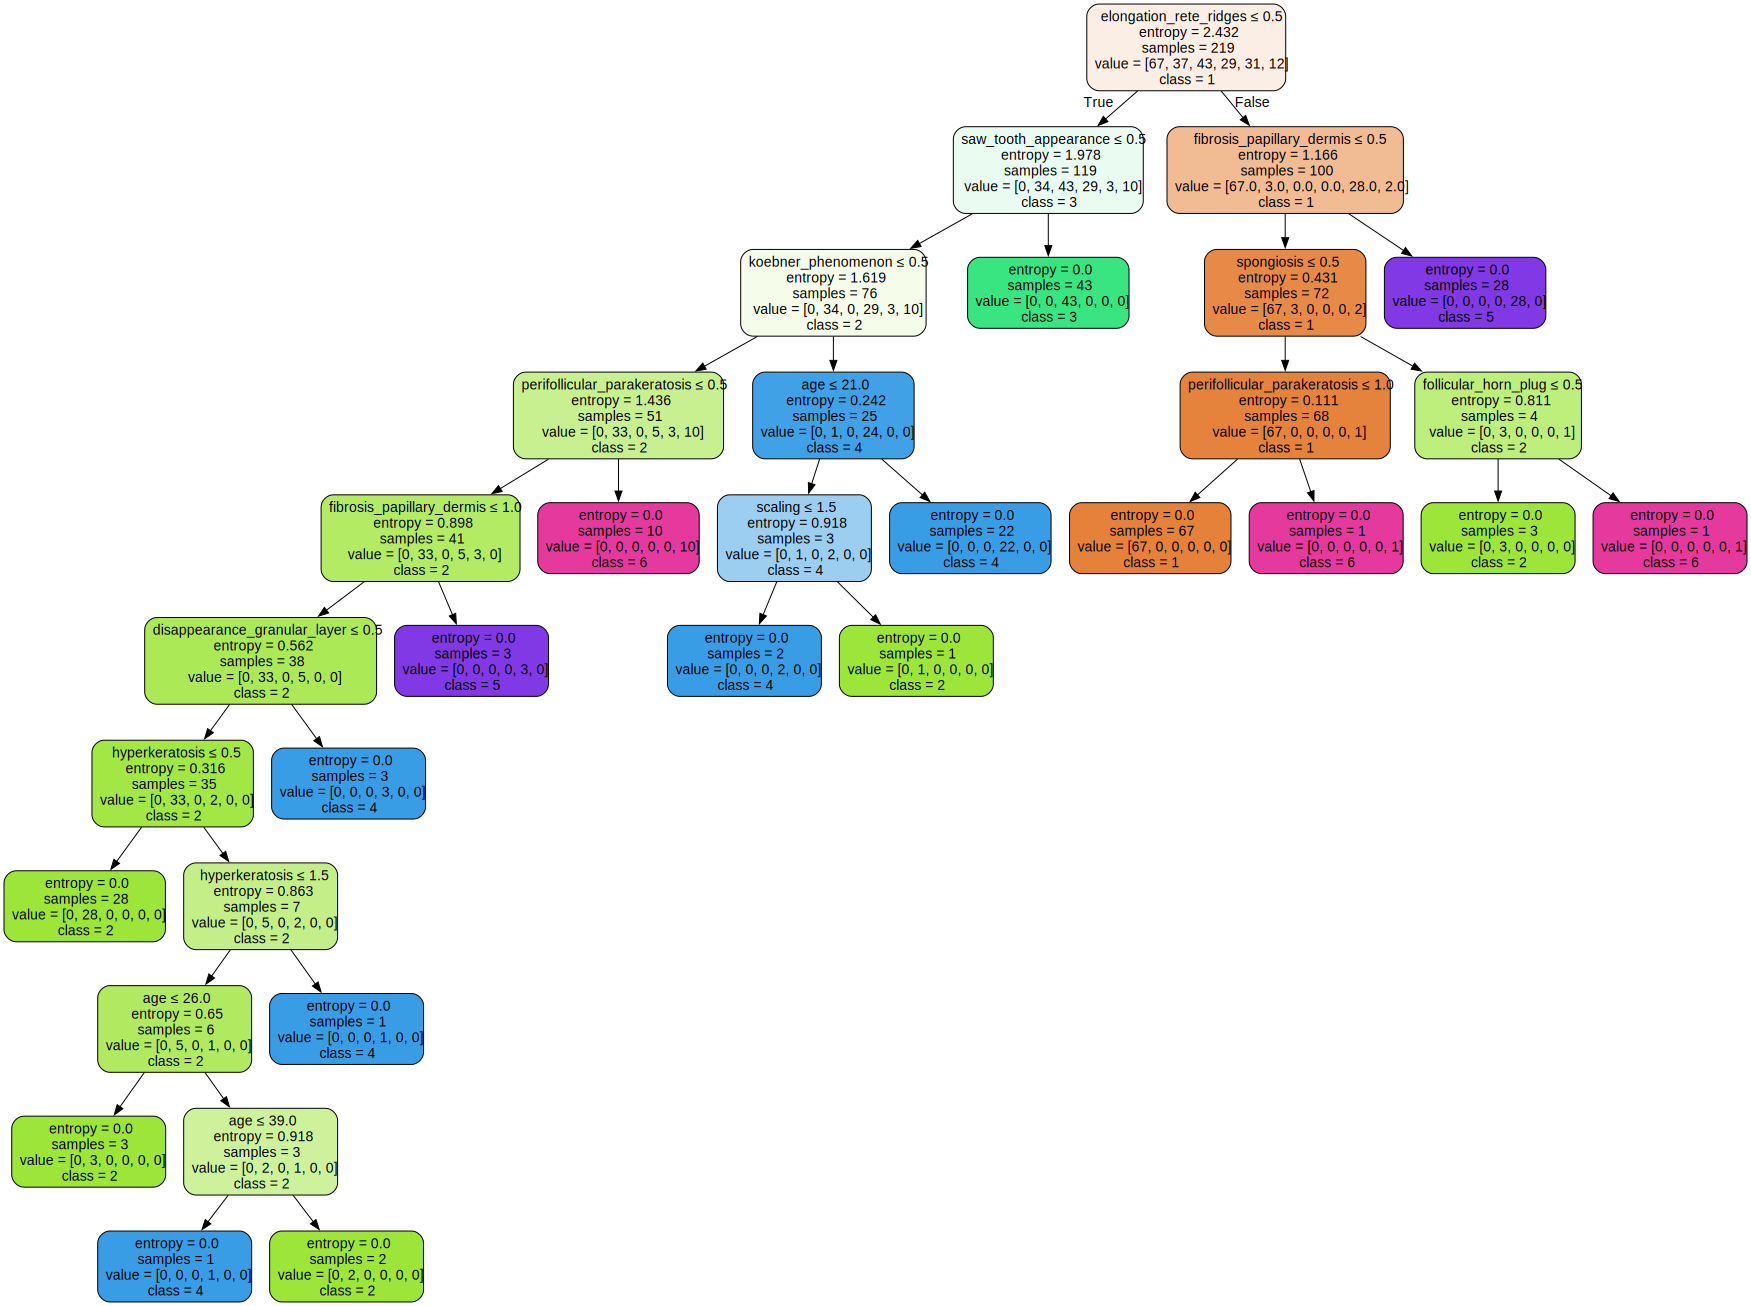


Classification Report for (60/40 split):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       0.92      0.92      0.92        24
           3       0.97      0.97      0.97        29
           4       0.85      0.85      0.85        20
           5       1.00      0.95      0.98        21
           6       0.89      1.00      0.94         8

    accuracy                           0.95       147
   macro avg       0.94      0.95      0.94       147
weighted avg       0.95      0.95      0.95       147

Crude Confusion matrix for (60/40 split):
[[45  0  0  0  0  0]
 [ 0 22  0  1  0  1]
 [ 0  0 28  1  0  0]
 [ 0  2  1 17  0  0]
 [ 0  0  0  1 20  0]
 [ 0  0  0  0  0  8]]


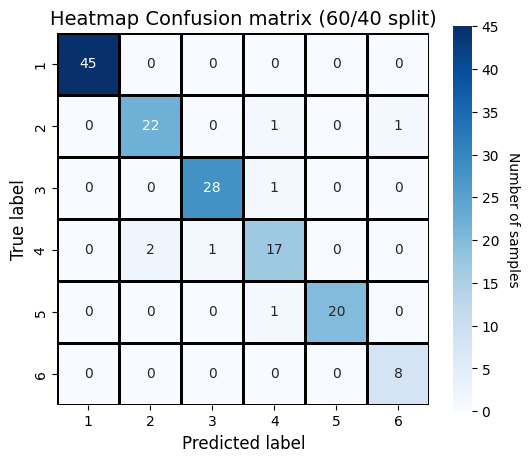


=== Decision Tree for 80/20 split ===


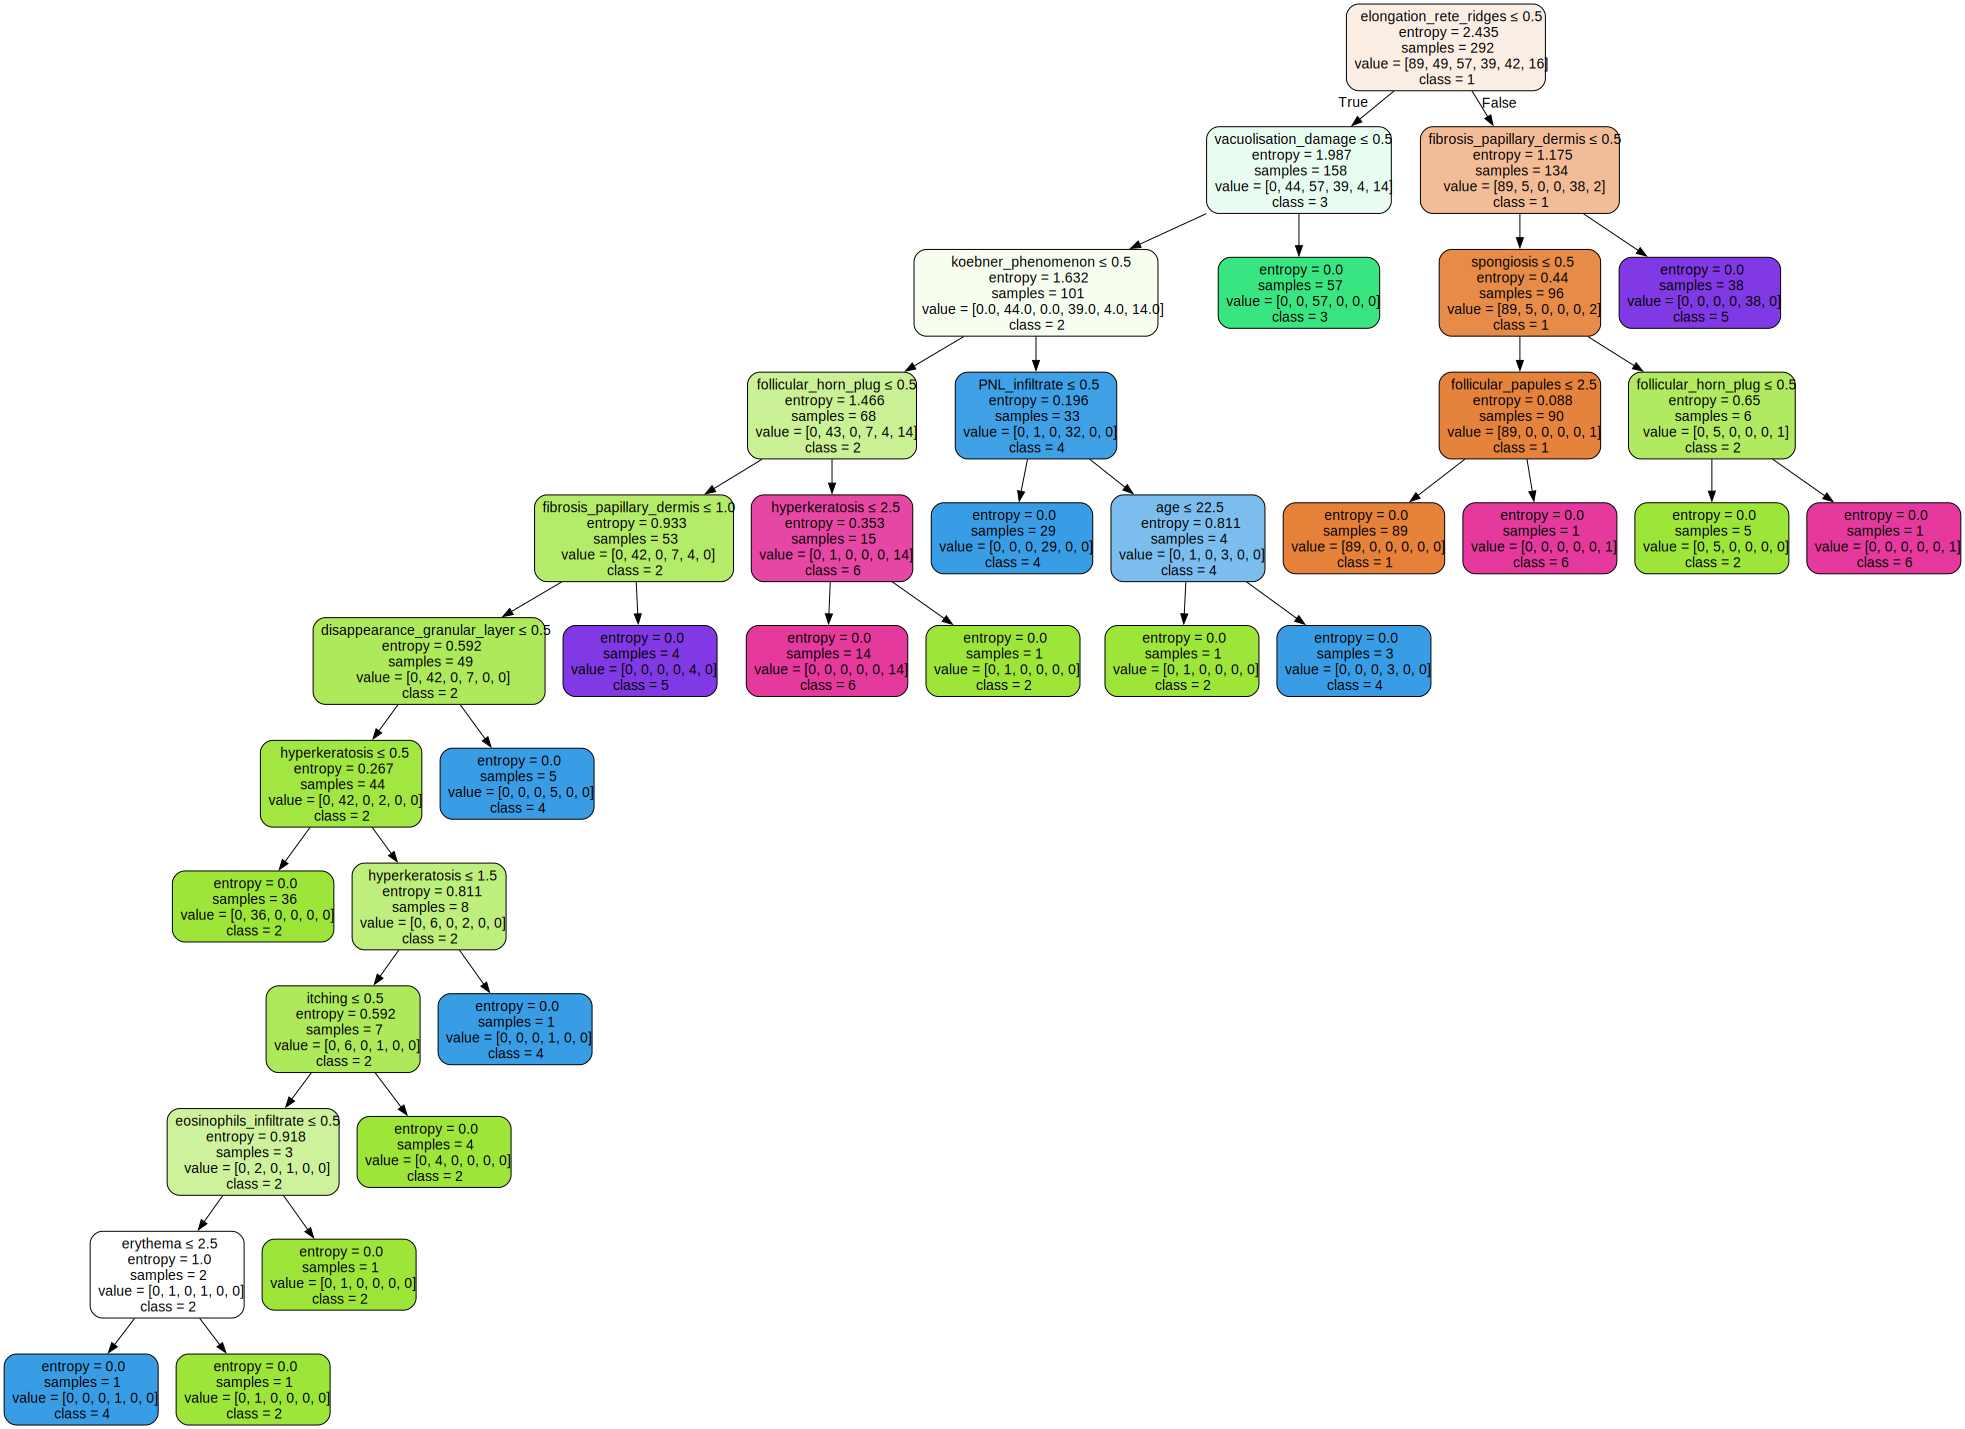


Classification Report for (80/20 split):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.86      1.00      0.92        12
           3       1.00      0.93      0.97        15
           4       0.82      0.90      0.86        10
           5       1.00      0.90      0.95        10
           6       1.00      0.75      0.86         4

    accuracy                           0.95        74
   macro avg       0.95      0.91      0.93        74
weighted avg       0.95      0.95      0.95        74

Crude Confusion matrix for (80/20 split):
[[23  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 14  1  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  1  9  0]
 [ 0  1  0  0  0  3]]


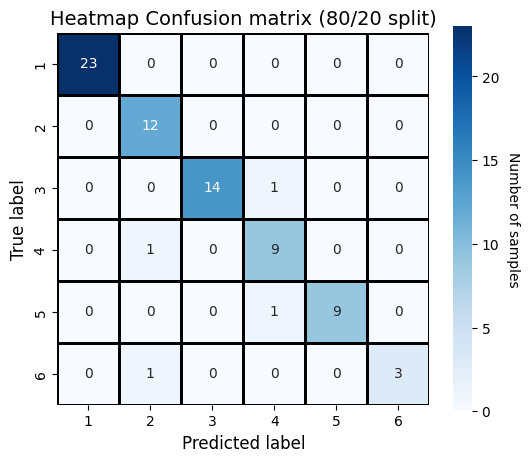


=== Decision Tree for 90/10 split ===


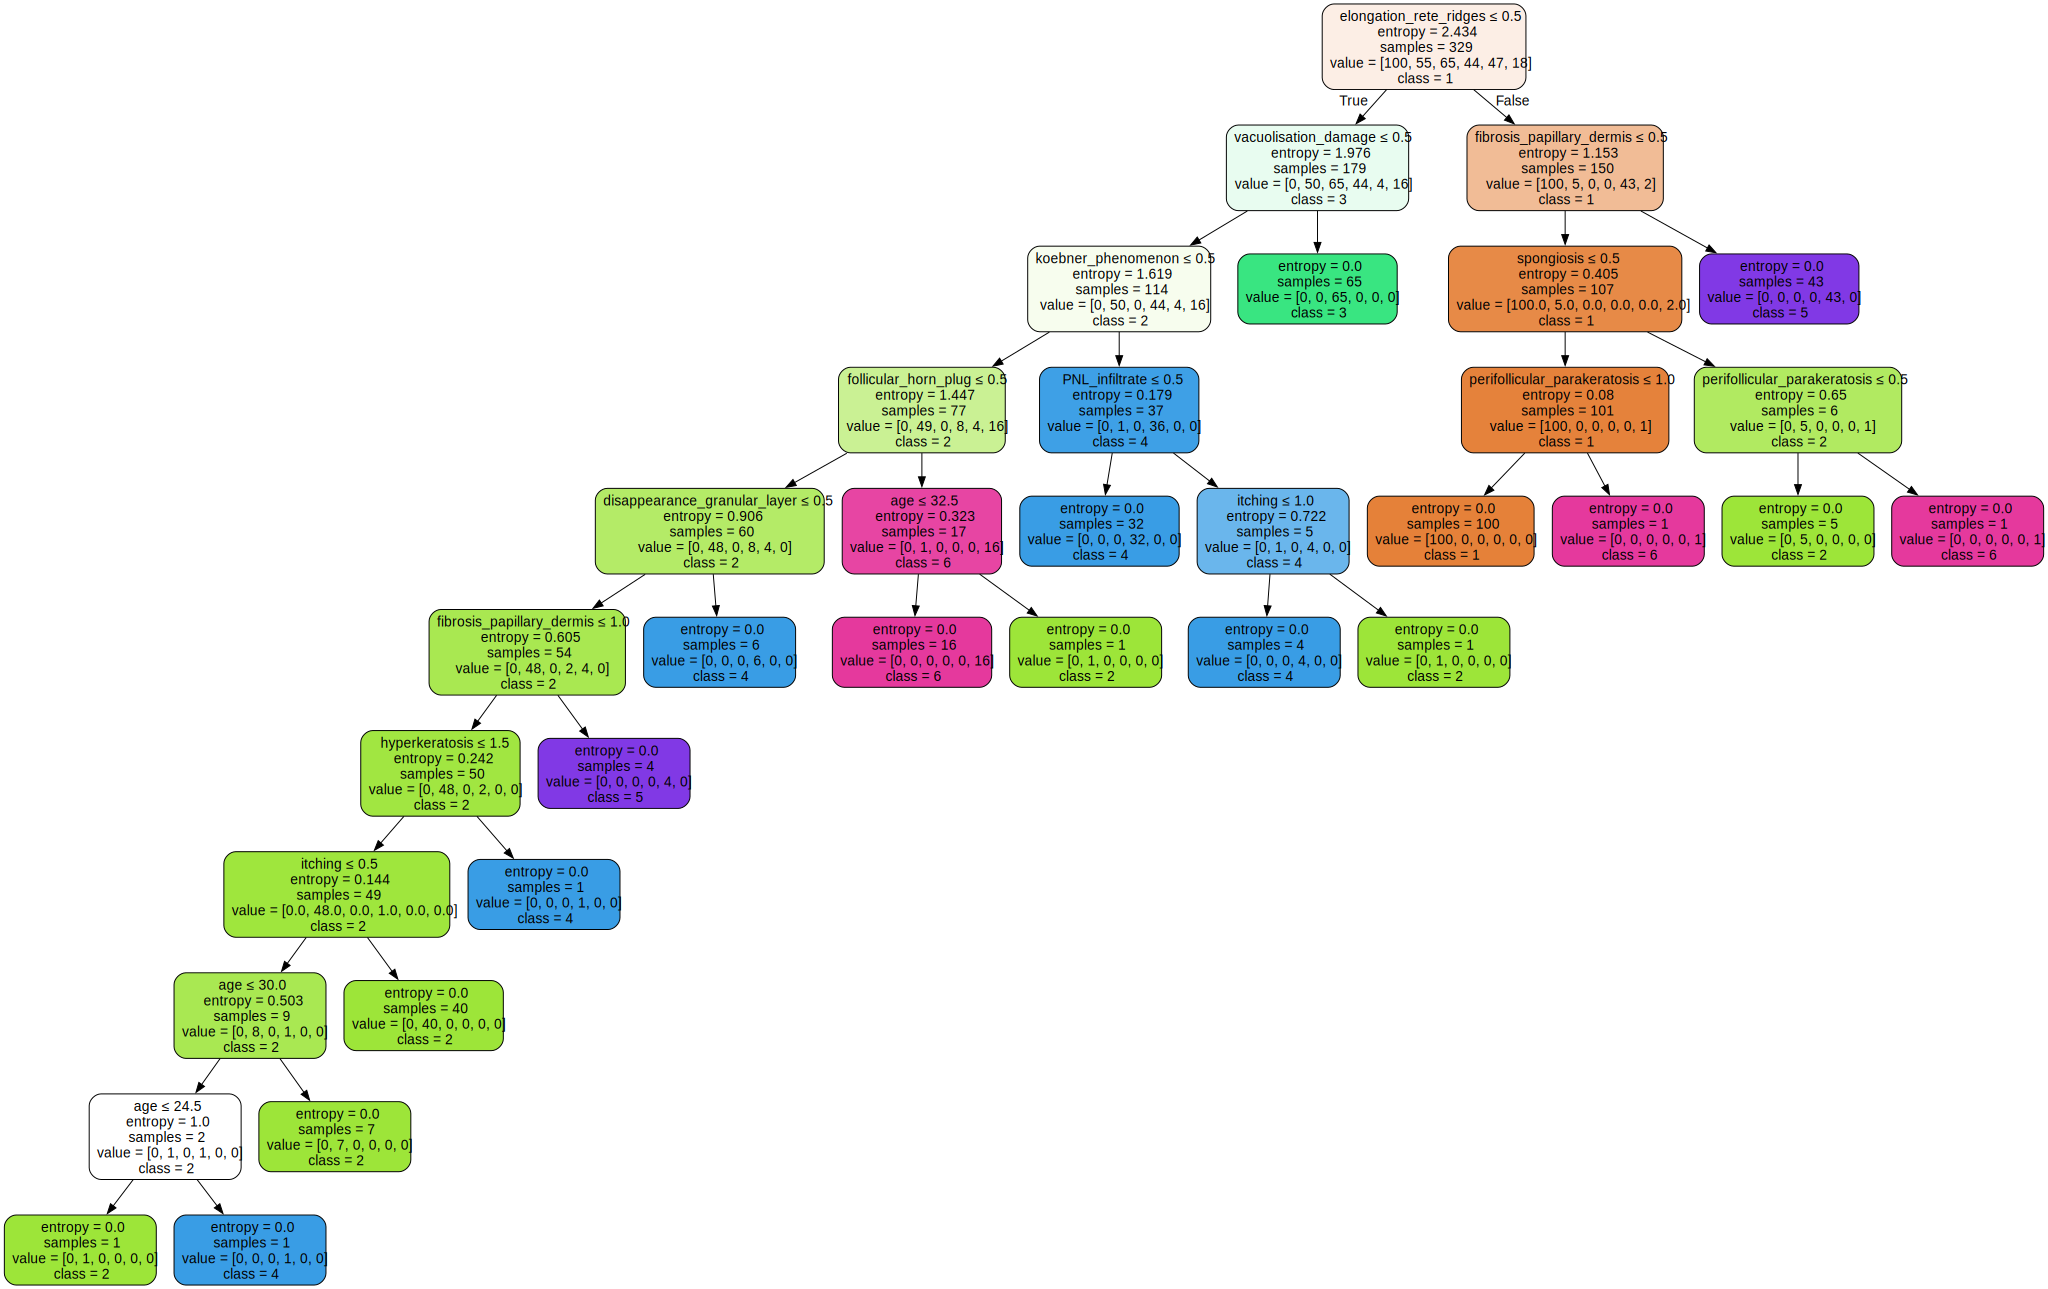


Classification Report for (90/10 split):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.75      1.00      0.86         6
           3       1.00      0.86      0.92         7
           4       0.67      0.80      0.73         5
           5       1.00      0.80      0.89         5
           6       1.00      0.50      0.67         2

    accuracy                           0.89        37
   macro avg       0.90      0.83      0.84        37
weighted avg       0.91      0.89      0.89        37

Crude Confusion matrix for (90/10 split):
[[12  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  6  1  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  1  4  0]
 [ 0  1  0  0  0  1]]


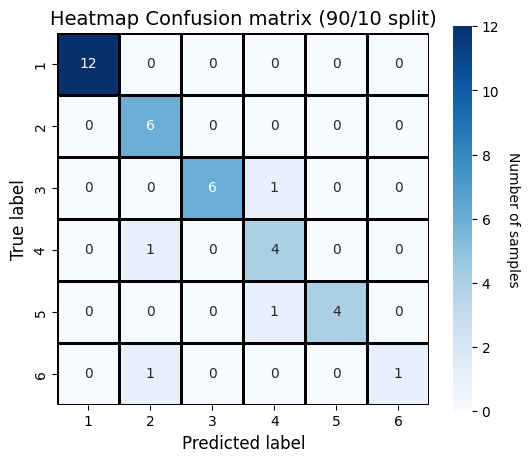

In [28]:
# Train, visualize, and evaluate Decision Tree for each split
for ratio, X_train, X_test, y_train, y_test in splits:
    print(f"\n=== Decision Tree for {ratio} split ===")
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    
    # Visualize the tree using Graphviz
    dot_data = export_graphviz(
        clf, out_file=None, 
        feature_names=X_train.columns,
        class_names=[str(cls) for cls in sorted(y_train.unique())],
        filled=True, rounded=True, special_characters=True
    )
    graph = graphviz.Source(dot_data)
    display(graph)
    
    # Predict and evaluate
    y_pred = clf.predict(X_test)
    print(f"\nClassification Report for ({ratio} split):")
    print(classification_report(y_test, y_pred))
    print(f"Crude Confusion matrix for ({ratio} split):")
    print(confusion_matrix(y_test, y_pred))
    
    # Colorful Confusion Matrix Visualization
    import seaborn as sns
    fig, ax = plt.subplots(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    labels = [str(cls) for cls in sorted(y_test.unique())]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax,
                xticklabels=labels, yticklabels=labels, linewidths=2, linecolor='black', square=True)
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    ax.set_title(f'Heatmap Confusion matrix ({ratio} split)', fontsize=14)
    cbar = ax.collections[0].colorbar
    cbar.set_label('Number of samples', rotation=270, labelpad=15)
    plt.show()